In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("https://raw.githubusercontent.com/signature95/tistory/main/dataset/boston.csv")
print(data)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  CAT. MEDV  
0       15.3  396.90   4.98  24.0          0  
1       17.8  396.90   9.14  

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


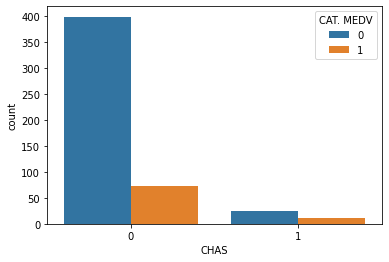

In [28]:
# 데이터 보기

print(data['MEDV'])

sns.countplot(data['CHAS'], hue=data['CAT. MEDV'])
plt.show()

In [29]:
# 평균값 도출을 위한 함수입니다.
def mean(data, column_name):
    print(f'해당 데이터의 컬럼 중 {column_name}의 평균값(mean)은 {data[column_name].mean()} 입니다.')

mean(data, 'MEDV')

해당 데이터의 컬럼 중 MEDV의 평균값(mean)은 22.532806324110677 입니다.


In [85]:
n = len(data)

# for 문을 활용한 MEDV 컬럼의 모든 데이터 합을 도출
summation = 0
for i in data['MEDV']:
    summation += i

# 데이터 합 / 데이터 개수 = 산술 평균 도출
print(summation/n)

22.532806324110698


In [42]:
# 기하평균
# 변수 설정
tem_data = np.random.randint(1, 11, 20) # 1부터 10까지 random하게 int를 10개 도출
mulScores = 1 # 곱셈에 대한 항등원 1

# 항목들로 반복 (tem_data의 모든 항목을 곱셈하기 위한 코드)
for item in tem_data:
    mulScores *= item
print(f'{tem_data} 내의 모든 값을 곱하면 {mulScores}가 됩니다.')    

# 제곱 연산자 '**'로 기하평균을 도츌합니다.
geometricMean1 = mulScores ** (1/len(tem_data)) 
print(f'해당 데이터의 기하평균 값은 {geometricMean1} 입니다.')

[ 4  1  4  2  8  1 10  9  5  5  2  3 10  1  1  5  2  6  2 10] 내의 모든 값을 곱하면 41472000000가 됩니다.
해당 데이터의 기하평균 값은 3.395375018400461 입니다.


In [55]:
# 가중평균
def weight_avg(data, weights, avg):
    weight = data[weights]
    tem_data = data[avg]

    print(f'{avg}의 {weights}에 대한 가중평균 값 :', sum(tem_data * weight)/sum(weight))
    
weight_avg(data, 'AGE', 'MEDV')


MEDV의 AGE에 대한 가중평균 값 : 21.112517687880594


In [67]:
# 인덱스 슬라이싱을 적용하여 tem_data 내에서 절사 시행
tem_data = np.random.randint(1, 11, 20).tolist() # 1부터 10까지 random하게 int를 10개 도출

# 변수 설정
cut = 0.15
n = len(tem_data)
cut_data = round(n * cut)

# 인덱싱 데이터 출력
print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data]}입니다.')

# 인덱싱 후 데이터의 평균 출력
print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {np.mean(tem_data[cut_data : -cut_data])}입니다.')

15.0% 비율로 절사한 후 data는 [7, 10, 2, 7, 1, 8, 8, 8, 4, 2, 6, 9, 7, 3]입니다.
15.0% 비율로 절사한 후 data의 평균은 5.857142857142857입니다.


In [72]:
def cut_mean(cut, data):
    # 변수 설정
    n = len(tem_data)
    cut_data = round(n * cut)

    # 인덱싱 데이터 출력
    print(f'{cut*100}% 비율로 절사한 후 data는 {tem_data[cut_data : -cut_data]}입니다.')

    # 인덱싱 후 데이터의 평균 출력
    print(f'{cut*100}% 비율로 절사한 후 data의 평균은 {np.mean(tem_data[cut_data : -cut_data])}입니다.')
    
# random한 데이터 형성
data = np.random.randint(1, 11, 20).tolist()

# 함수 적용
cut_mean(0.15, data)

15.0% 비율로 절사한 후 data는 [7, 10, 2, 7, 1, 8, 8, 8, 4, 2, 6, 9, 7, 3]입니다.
15.0% 비율로 절사한 후 data의 평균은 5.857142857142857입니다.


In [81]:
# 하나씩 실행해보는 부분
# data 형성
data = np.random.randint(1, 11, 20).tolist() 

# 오름차순으로 정렬한 검거율 데이터를 따로 형성
tem_data = sorted(data)
print(tem_data)

# 검거율 데이터의 길이를 2로 나눈 몫을 출력
center = len(tem_data) // 2
print(center)

# 인덱스로 접근하여 tem_data의 center번째 값과 -center번째 (= center -1 번째) 값을 더한 후 2로 나눠준다.
# 참고로 인덱스는 0부터 시작한다.
print((tem_data[center] + tem_data[-center - 1])/2)

[1, 1, 2, 2, 3, 4, 4, 5, 5, 5, 5, 6, 8, 8, 8, 9, 9, 10, 10, 10]
10
5.0


In [79]:
# 중위값(median) 도출을 위한 함수입니다. (파이썬 함수를 활용한 중위값 출력 부분)
def median(data):
    print(data)
    print(f'해당 데이터의 중위값(median)은 {np.median(data)} 입니다.')
    
data = np.random.randint(1, 11, 20).tolist()

median(data)

[1, 9, 1, 4, 7, 1, 7, 3, 3, 5, 3, 5, 1, 4, 6, 6, 4, 3, 5, 3]
해당 데이터의 중위값(median)은 4.0 입니다.


In [4]:
# 오름차순 정렬
data = np.random.randint(1, 100, 50).tolist() 

tmp_data = sorted(data)
print(f'오름차순 정렬한 값 : {tmp_data}')

# 최솟값과 최댓값 출력
print(f'최소값 : {tmp_data[0]}')
print(f'최댓값 : {tmp_data[-1]}')

오름차순 정렬한 값 : [7, 10, 13, 15, 15, 16, 16, 16, 19, 19, 21, 23, 24, 29, 31, 32, 39, 39, 42, 43, 47, 47, 49, 51, 53, 54, 54, 56, 62, 63, 63, 65, 69, 69, 74, 75, 79, 80, 81, 82, 83, 85, 87, 92, 94, 94, 96, 96, 98, 99]
최소값 : 7
최댓값 : 99


In [11]:
# max, min 매서드 활용
print(f'최솟값 : {min(data.MEDV)}')
print(f'최댓값 : {max(data.MEDV)}')

# 따라서 범위는 최댓값 - 최솟값으로 출력할 수 있음.
print(f'MEDV 데이터의 범위는 최소 {min(data.MEDV)}에서 최대 {max(data.MEDV)}로 {round(max(data.MEDV) - min(data.MEDV),2)}의 범위를 가지고 있습니다.')


최솟값 : 5.0
최댓값 : 50.0
MEDV 데이터의 범위는 최소 5.0에서 최대 50.0로 45.0의 범위를 가지고 있습니다.


In [13]:
def min_max(data, columns):
    # print(f'데이터 : {data[columns].tolist()}')
    print(f'최솟값 : {min(data[columns])}')
    print(f'최댓값 : {max(data[columns])}')
    print(f"'{columns}' 데이터의 범위는 최소 {min(data[columns])}에서 최대 {max(data[columns])}로 {round(max(data[columns]) - min(data[columns]),2)}의 범위를 가지고 있습니다.")

min_max(data, 'MEDV')

최솟값 : 5.0
최댓값 : 50.0
'MEDV' 데이터의 범위는 최소 5.0에서 최대 50.0로 45.0의 범위를 가지고 있습니다.


In [15]:
n = len(data)
m = data['MEDV'].mean()

# 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
# 편차 = 변량 - 평균
resid = pow(data['MEDV'] - m, 2)

# 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')

편차의 제곱합의 평균, 즉 분산은 84.41955615616561입니다.


In [3]:
def varianve(data, columns):
    n = len(data)
    m = data[columns].mean()

    # 제곱을 해주는 매서드 pow를 활용하여 편차의 제곱 도출
    # 편차 = 변량 - 평균
    resid = pow(data[columns]-m, 2)

    # 제곱합을 한 후, 변량의 개수로 나눠주면 분산 도출
    print(f'편차의 제곱합의 평균, 즉 분산은 {sum(resid)/n}입니다.')
    # 분산값에 제곱근은 표준편차
    print(f'표준편차는 {pow(sum(resid)/n, 1/2)}입니다.')
    
varianve(data,'MEDV')

편차의 제곱합의 평균, 즉 분산은 84.41955615616561입니다.
표준편차는 9.188011545278206입니다.


In [17]:
np.var(data['MEDV'])

84.41955615616556

In [18]:
# 표쥰편차는 분산의 제곱근입니다.
print(pow(np.var(data['MEDV']),1/2))

# numpy의 std 매서드를 활용한 표준편차 도출
print(np.std((data['MEDV'])))

9.188011545278203
9.188011545278203


In [20]:
# 변수 설정
n = len(data['MEDV'])
m = data['MEDV'].mean()
std = np.std(data['MEDV'])

# 편차/표쥰편차 값에 3제곱 시행 
tmp_result = pow((data['MEDV'] - m)/std, 3)
# print(f'편차/표쥰편차의 3제곱 : {tmp_result.tolist()}')

# 3제곱 한 값을 더하고 데이터 개수만큼 나누면 왜도 도출
result = sum(tmp_result)/n
print(f'왜도 : {result}')

왜도 : 1.1048108228646343


In [22]:
# 함수화 작업
def skewness(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow((data - m)/std, 3)
    result = sum(tmp_result)/n
    return result


skewness(data['MEDV'])

1.1048108228646343

In [23]:
print(data['MEDV'].skew())

# 라이브러리 import로 구한 skew
from scipy.stats import skew

print(skew(data['MEDV']))

1.1080984082549072
1.104810822864635


In [24]:
# 변수 설정
n = len(data['MEDV'])
m = data['MEDV'].mean()
std = np.std(data['MEDV'])

# 편차/표준편차의 4제곱 시행
tmp_result = pow(((data['MEDV'] - m) / std), 4)
# print(f'편차/표쥰편차의 4제곱 : {tmp_result.tolist()}')

# 4제곱 한 값을 더하고 데이터 개수만큼 나누고 -3을 하면 첨도 도출
result = sum(tmp_result)/n - 3
print(f'첨도 : {result}')

첨도 : 1.4686287722747418


In [25]:
# 함수화
def kurtosis_self(data):
    n = len(data)
    m = data.mean()
    std = np.std(data)
    
    tmp_result = pow(((data - m) / std), 4)
    result = sum(tmp_result)/n - 3
    return result

kurtosis_self(data['MEDV'])

1.4686287722747418

In [26]:
# 라이브러리 import로 구한 kurtosis
from scipy.stats import kurtosis

kurtosis(data['MEDV'])

1.4686287722747462

In [29]:
def describe_data(data, column, returns = True):
    """[summary]

    Args:
        data ([dataframe]): [데이터프레임 이름을 입력합니다]
        column ([string]): [컬럼명을 입력합니다]
        returns (bool, optional): [describe()함수를 이용한 출력 결과를 표시하는지 여부입니다.]. 기본값은 True입니다.

    Returns:
        [type]: [describe()함수를 이용한 출력 결과를 표시]
    """
    
    for i in [0,1,2,2,3,7]:
        print(f"데이터 컬럼 명 '{column}'의 {data[column].describe().index[i]}는 {round(data[column].describe()[i],2)}입니다.")
        
    if returns == True:
        return data[column].describe()
    else :
        return 

# describe_data(data, '검거율')
describe_data(data, 'MEDV', returns = False)

데이터 컬럼 명 'MEDV'의 count는 506.0입니다.
데이터 컬럼 명 'MEDV'의 mean는 22.53입니다.
데이터 컬럼 명 'MEDV'의 std는 9.2입니다.
데이터 컬럼 명 'MEDV'의 std는 9.2입니다.
데이터 컬럼 명 'MEDV'의 min는 5.0입니다.
데이터 컬럼 명 'MEDV'의 max는 50.0입니다.
